# Table of Contents <a id="top"></a>

1. [Data Exploration](#load_data)<br>
    1.1. [Introduction to Dataset](#intro)<br>
    1.2. [Data Distribution and Visualization of Raw Data](#data-visualization-raw)<br>
    
    
2. [Data Preprocessing](#data-preprocessing)<br>
    2.1.  [Row and Column Deletion](#row-column-deletion)<br>
    2.2.  [Decoding of ID Features](#decoding)<br>
    2.3.  [Imputation of Missing Values](#imputation)<br>
    2.4.  [Ordinal Encoding of Age Feature](#ordinal-encoding)<br>
    2.5.  [Complexity Reduction by Grouping Values](#grouping)<br>
    2.6.  [Transformation of Target Variable](#target)<br>
    2.7.  [One-hot Encoding](#one-hot-encoding)<br>
    2.8.  [Split into Training and Test Sets](#train-test-split)<br>
    2.9.  [Data Balancing](#balancing)<br>
    2.10. [Save Preprocessed Dataframes](#"save")<br>

 
3. [Model Building](#model-building)<br>
    3.1 [Logistic Regression](#logistic-regression)<br>
    3.2 [Naive Bayes](#naive-bayes)<br>
    3.3 [Random Forest](#random-forest)<br>
    3.4 [CatBoost](#catboost)<br>
    3.5 [XGBoost](#xgboost)<br>


4. [Final Model Evaluation and Conclusion](#model-evaluation)<br>



In [1]:
# Import statements

# Data Processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context('talk')

# Data Resampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report




Bad key text.latex.unicode in file C:\Users\fabio\anaconda3\envs\fastai-cpu-v0.7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\fabio\anaconda3\envs\fastai-cpu-v0.7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\fabio\anaconda3\envs\fastai-cpu-v0.7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an

# 1. Data Exploration
[Back to top](#top)

In this first section, we aim at understanding our data as good as possible.

## 1.1. Introduction to dataset <a id="intro"></a>
[Back to top](#top)

- Import data, originally from https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008

In [2]:
raw_data_mappings = "https://raw.githubusercontent.com/F4LLC0N3R/ML-Group-2---Diabetes/main/data/IDs_mapping.csv"
raw_data_diabetes = "https://raw.githubusercontent.com/F4LLC0N3R/ML-Group-2---Diabetes/main/data/diabetic_data.csv"

df_mappings = pd.read_csv(raw_data_mappings)
df_diabetes = pd.read_csv(raw_data_diabetes)

- Size of dataset

In [3]:
df_diabetes.shape

(101766, 50)

- First look on data

In [4]:
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


- Get basic characteristics of the columns

In [5]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

- Check for missing values

In [6]:
# Number of NaN values in the raw dataset
df_diabetes.isnull().sum().sum()

0

In [7]:
# missing values represented by '?'
df_diabetes.isin(['?']).sum(axis=0).sort_values(ascending=False)

weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
num_procedures                  0
max_glu_serum                   0
number_diagnoses                0
number_inpatient                0
number_emergency                0
number_outpatient               0
num_medications                 0
readmitted                      0
num_lab_procedures              0
diabetesMed                     0
time_in_hospital                0
admission_source_id             0
discharge_disposition_id        0
admission_type_id               0
age                             0
gender                          0
patient_nbr                     0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
change                          0
metformin-piog

In [8]:
# show percentage of missing values
percentage_missing = df_diabetes.isin(['?']).sum(axis=0)/len(df_diabetes)*100
percentage_missing.sort_values(ascending=False)

weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
num_procedures               0.000000
max_glu_serum                0.000000
number_diagnoses             0.000000
number_inpatient             0.000000
number_emergency             0.000000
number_outpatient            0.000000
num_medications              0.000000
readmitted                   0.000000
num_lab_procedures           0.000000
diabetesMed                  0.000000
time_in_hospital             0.000000
admission_source_id          0.000000
discharge_disposition_id     0.000000
admission_type_id            0.000000
age                          0.000000
gender                       0.000000
patient_nbr                  0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide 

$\rightarrow$ 43 columns are complete. Three features have a substantial amount of missing values: weight (96.86% missing), payer code (39.56%), and medical specialty (49.08%). Four features have a small amount of missing values: race (2.23%), primary diagnosis (0.02%), secondary diagnosis (0.35%), and additional secondary diagnosis (1.40%)

- Check for duplicate rows

In [9]:
df_diabetes.duplicated().sum()

0

$\rightarrow$ No duplicate rows in the dataset!

- Check number of unique values in every column

In [10]:
df_diabetes.nunique().sort_values(ascending=False)

encounter_id                101766
patient_nbr                  71518
diag_3                         790
diag_2                         749
diag_1                         717
num_lab_procedures             118
num_medications                 75
medical_specialty               73
number_outpatient               39
number_emergency                33
discharge_disposition_id        26
number_inpatient                21
payer_code                      18
admission_source_id             17
number_diagnoses                16
time_in_hospital                14
weight                          10
age                             10
admission_type_id                8
num_procedures                   7
race                             6
repaglinide                      4
max_glu_serum                    4
A1Cresult                        4
metformin                        4
rosiglitazone                    4
pioglitazone                     4
insulin                          4
nateglinide         

In [11]:
for col in df_diabetes:
    print(f'{col}: {df_diabetes[col].unique()}')

encounter_id: [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr: [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id: [6 1 2 3 4 5 8 7]
discharge_disposition_id: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General'

In [12]:
# Number of rows which contain a patient number which were documented before
df_diabetes.duplicated(subset='patient_nbr').sum()

30248

In [13]:
# share of encounters from patients who are already documented in the dataset
df_diabetes.duplicated(subset='patient_nbr').sum() / df_diabetes.shape[0]

0.29723090226598275

$\rightarrow$ The encounter ID is different for every single instance in the dataset. The column can be dropped later since it is just a unique label for every row.
However, the number of patient numbers is smaller than the number of encounters (difference of 30,248) which means that the dataset contains readmissions of some patients. In fact, 29.7% of all encounters are readmissions.
$\rightarrow$ Two medication columns only have one unique value ('no') and can be dropped.

### <span style='color:red'> Should we drop rows such that there is only one encounter per patient left in the dataset? Why?

**Article:** "The preliminary dataset contained multiple inpatient visits for some patients and the observations could not be considered as statistically independent, an assumption of the logistic regression model. We thus used only one encounter per patient; in particular, we considered only the first encounter for each patient as the primary admission and determined whether or not they were readmitted within 30 days."

## 1.2. Distribution and Visualization of Raw Data <a id="data-visualization-raw"></a>
[Back to top](#top)

In this section, we have a detailed look into the datatype of every column and the data distribution of the respective features.

- Basic statistics (of numerical columns)

In [14]:
df_diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


- Correlation matrix heatmap on raw data

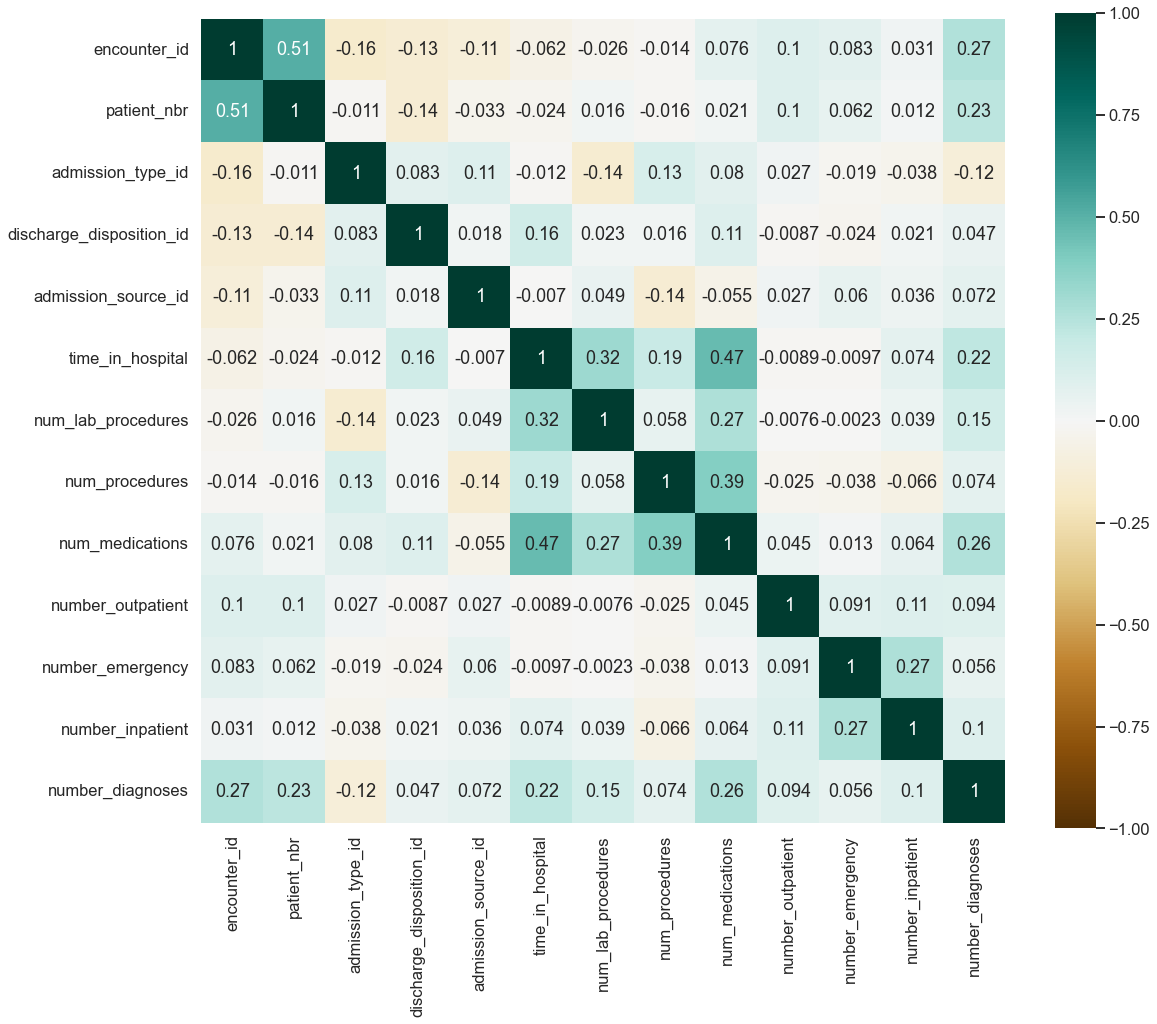

In [15]:
plt.figure(figsize=(18, 15))
sns.heatmap(df_diabetes.corr(), annot=True, vmin=-1, center=0,
            square=True,cmap='BrBG')
plt.savefig('plots/raw_data/corrmatrix_heatmap.png', dpi=300, bbox_inches='tight')
#df_diabetes.corr()["readmitted"].sort_values(ascending=False)

### Categorical data

- Target question: Is the patient readmitted after being released from the hospital? If yes, within 30 days or after?

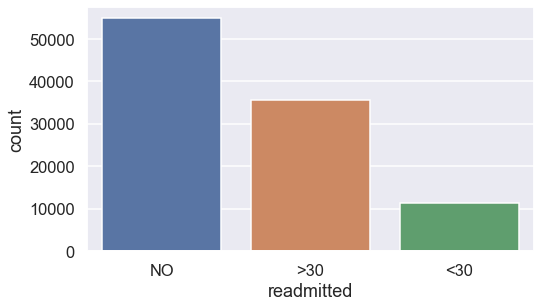

In [16]:
plt.figure(figsize=(8,4.5))
sns.countplot(data=df_diabetes, x='readmitted')
plt.savefig('plots/raw_data/readmitted.png', dpi=300, bbox_inches='tight')

- Demographic features

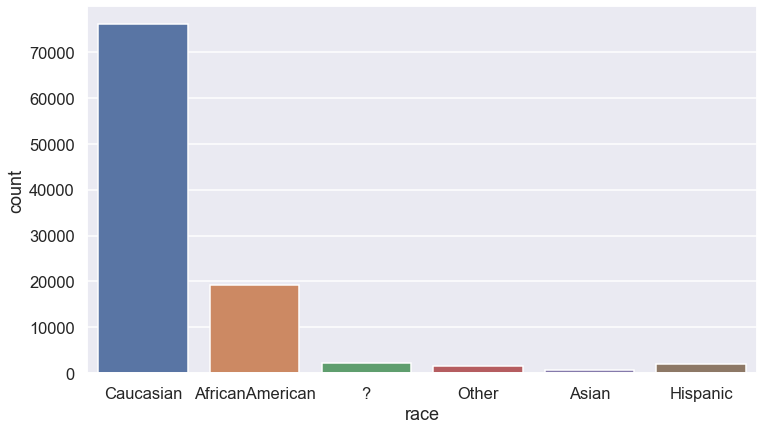

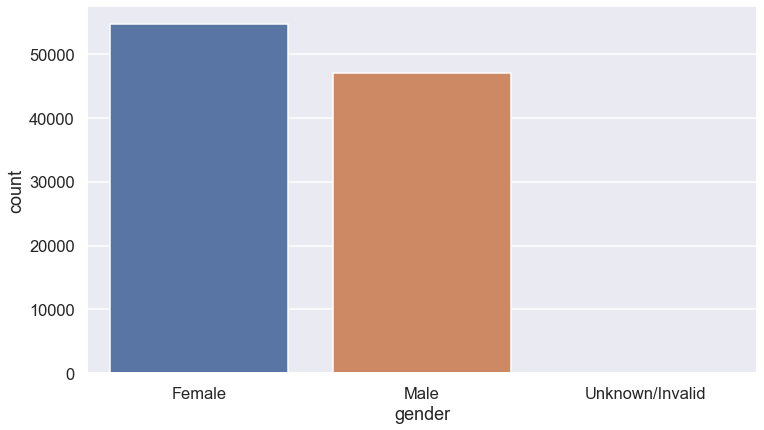

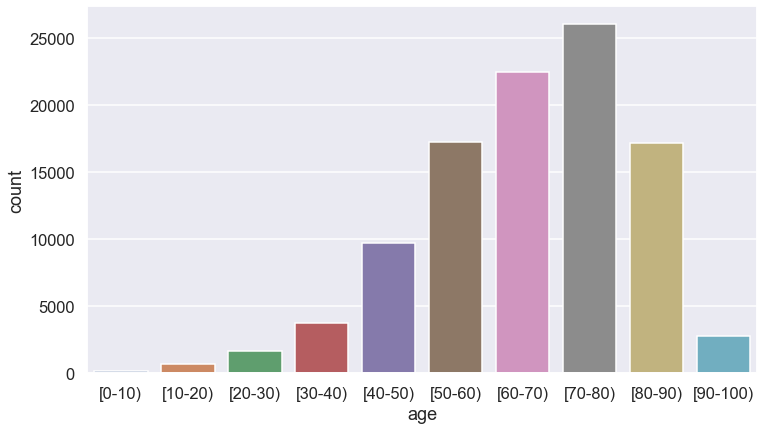

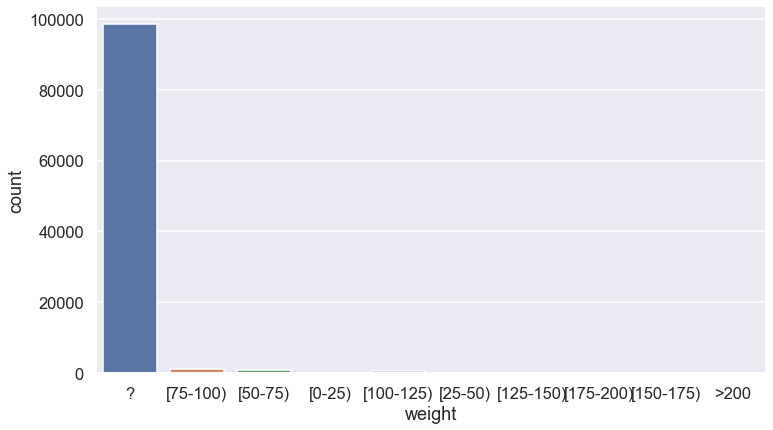

In [17]:
for col in ['race', 'gender', 'age', 'weight']:
    plt.figure(figsize=(12, 6.75))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/raw_data/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

- Test results and medication decisions

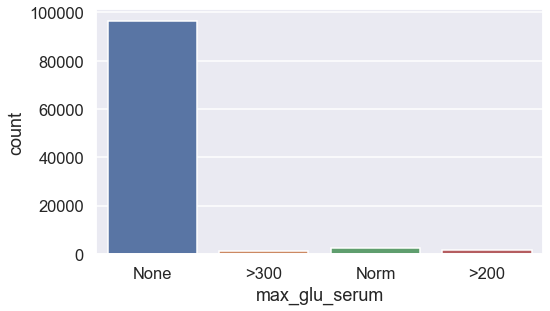

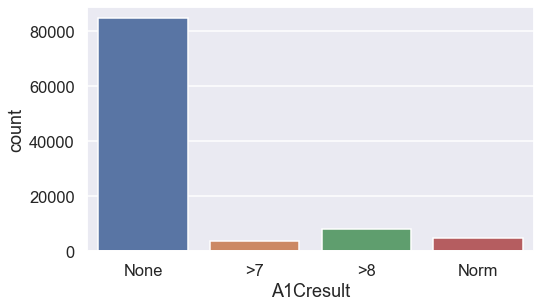

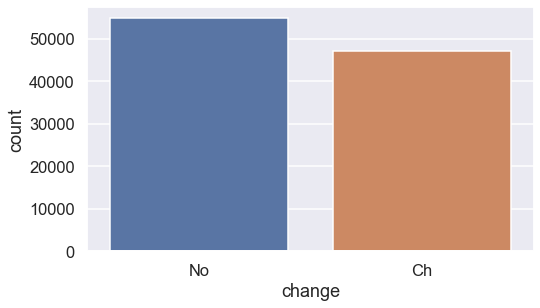

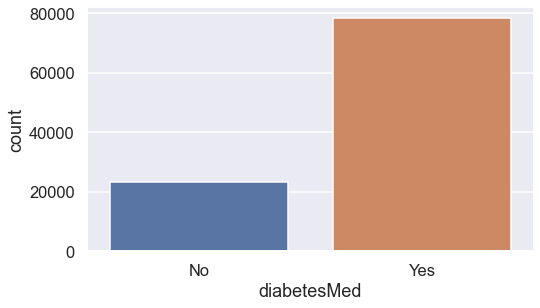

In [18]:
for col in ['max_glu_serum',
            'A1Cresult',
            'change',
            'diabetesMed']:
    plt.figure(figsize=(8,4.5))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/raw_data/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

- 23 features for medications

In [19]:
medications = ['metformin',
               'repaglinide',
               'nateglinide',
               'chlorpropamide',
               'glimepiride',
               'acetohexamide',
               'glipizide',
               'glyburide',
               'tolbutamide',
               'pioglitazone',
               'rosiglitazone',
               'acarbose',
               'miglitol',
               'troglitazone',
               'tolazamide',
               'examide',
               'citoglipton',
               'insulin',
               'glyburide-metformin',
               'glipizide-metformin',
               'glimepiride-pioglitazone',
               'metformin-rosiglitazone',
               'metformin-pioglitazone'
              ]

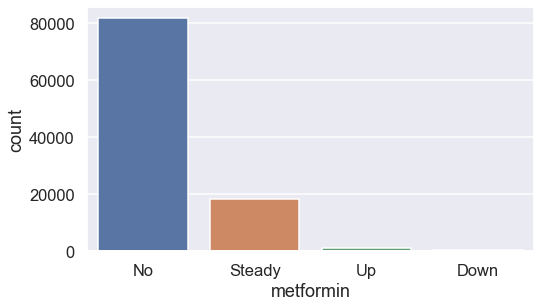

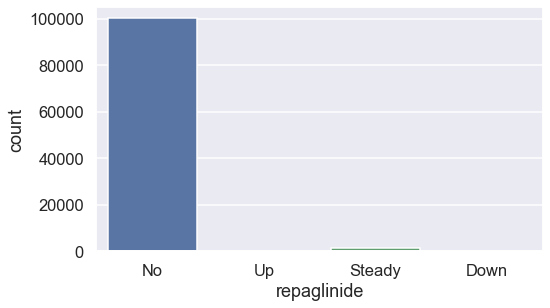

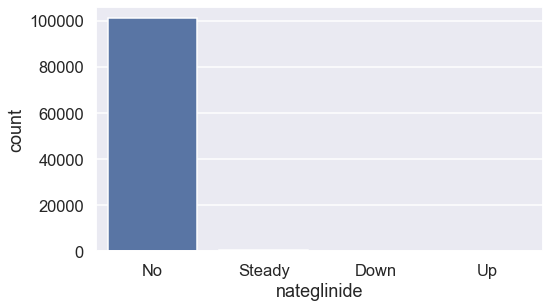

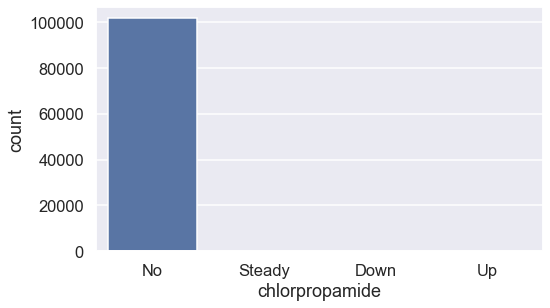

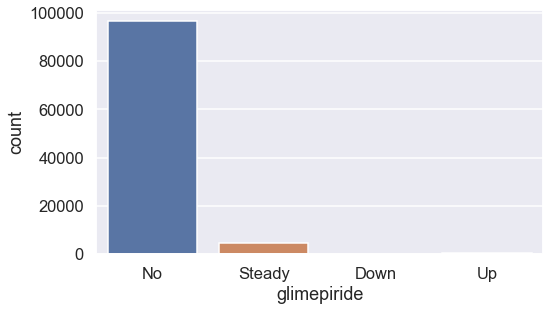

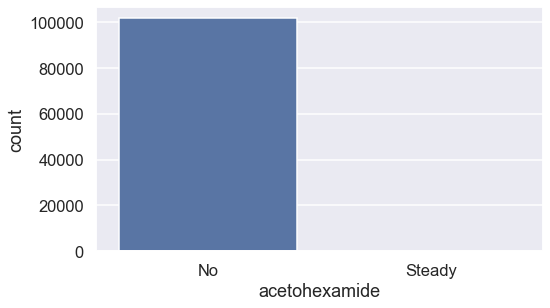

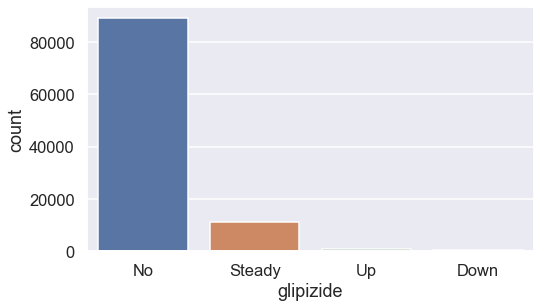

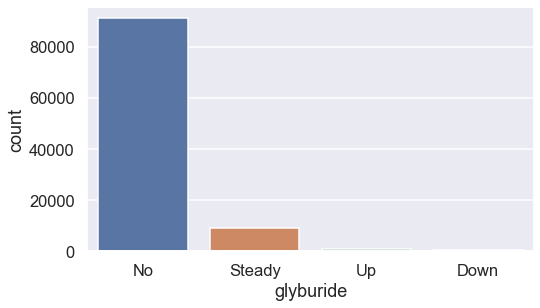

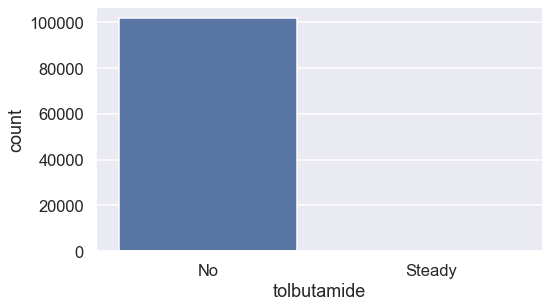

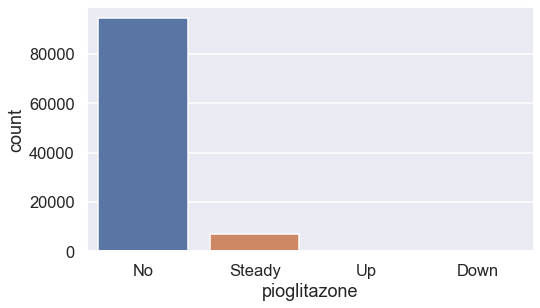

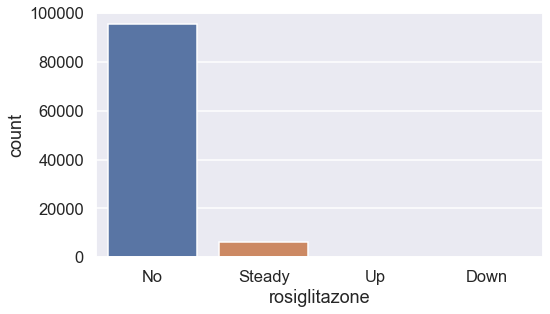

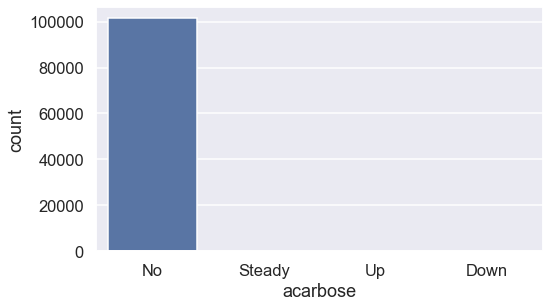

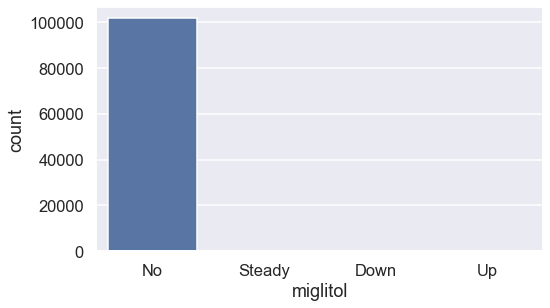

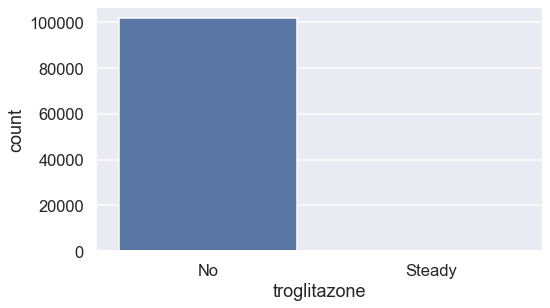

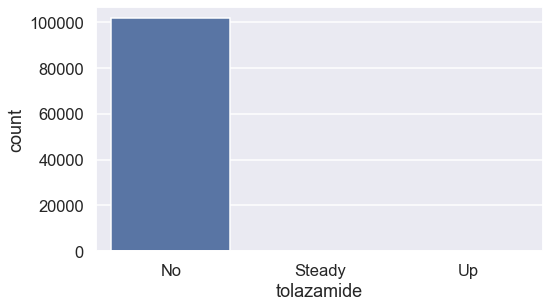

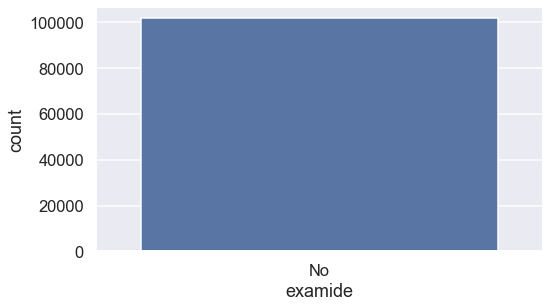

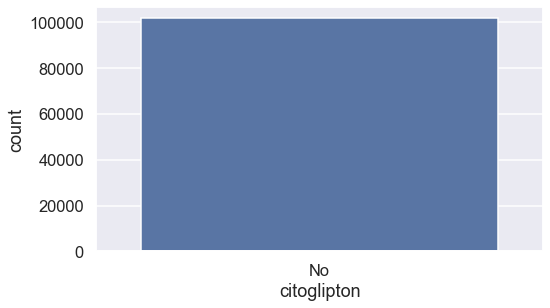

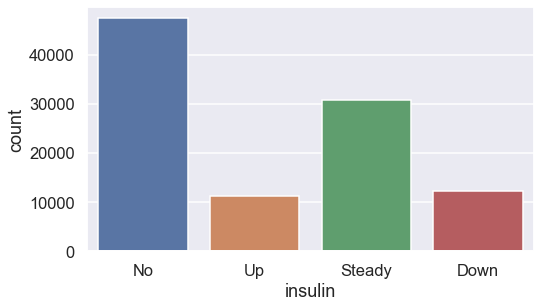

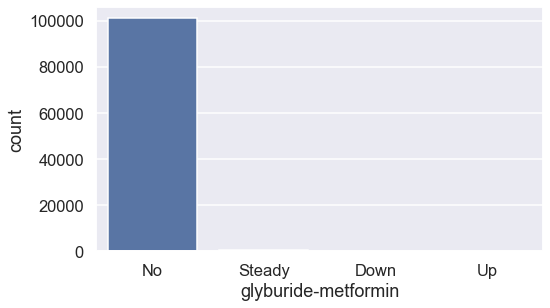

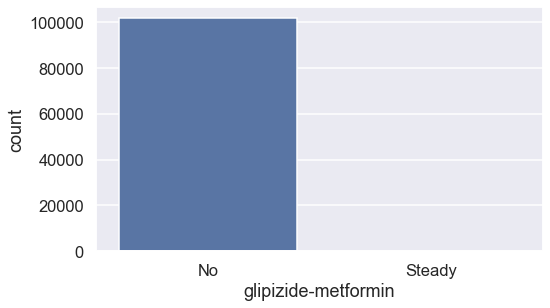

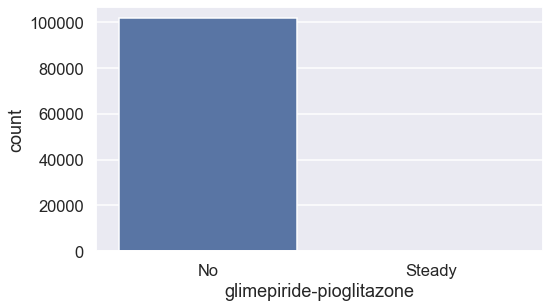

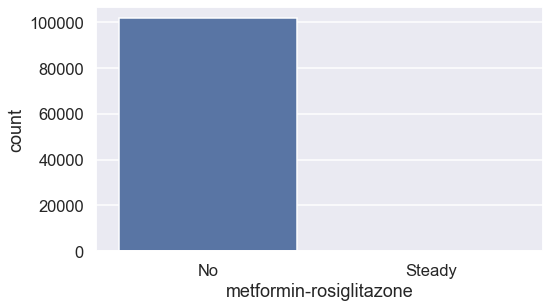

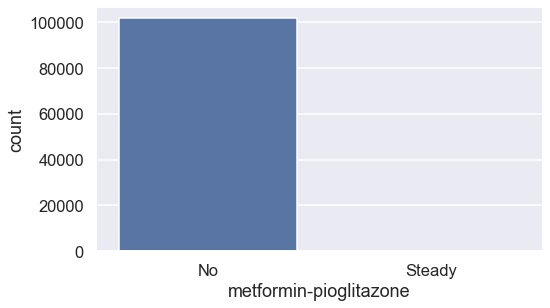

In [20]:
for col in medications:
    plt.figure(figsize=(8,4.5))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/raw_data/medications/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

- Encoded categorical features

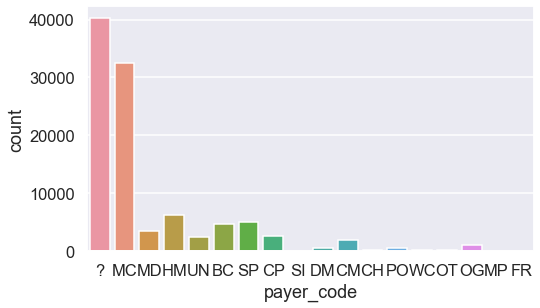

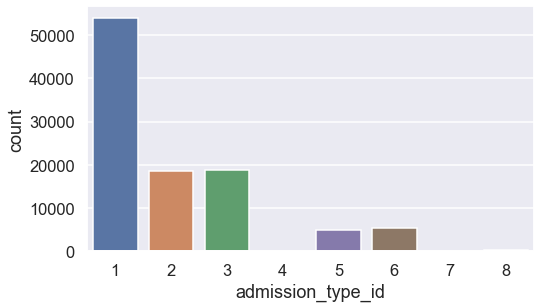

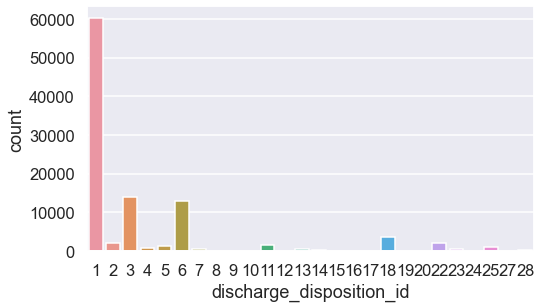

In [21]:
for col in ['payer_code',
            'admission_type_id',
            'discharge_disposition_id']:
    plt.figure(figsize=(8,4.5))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/raw_data/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

- Encoded features with too many unique values (not plotted)

In [22]:
df_diabetes['medical_specialty'].nunique()

73

In [23]:
df_diabetes['diag_1'].nunique()

717

In [24]:
df_diabetes['diag_2'].nunique()

749

In [25]:
df_diabetes['diag_3'].nunique()

790

### Quantitative data

In [26]:
quantitative = ['time_in_hospital', 
                'num_lab_procedures',
                'num_procedures',
                'num_medications',
                'number_outpatient', 
                'number_emergency',
                'number_inpatient',
                'number_diagnoses']

- Pairwise correlation / scatterplots

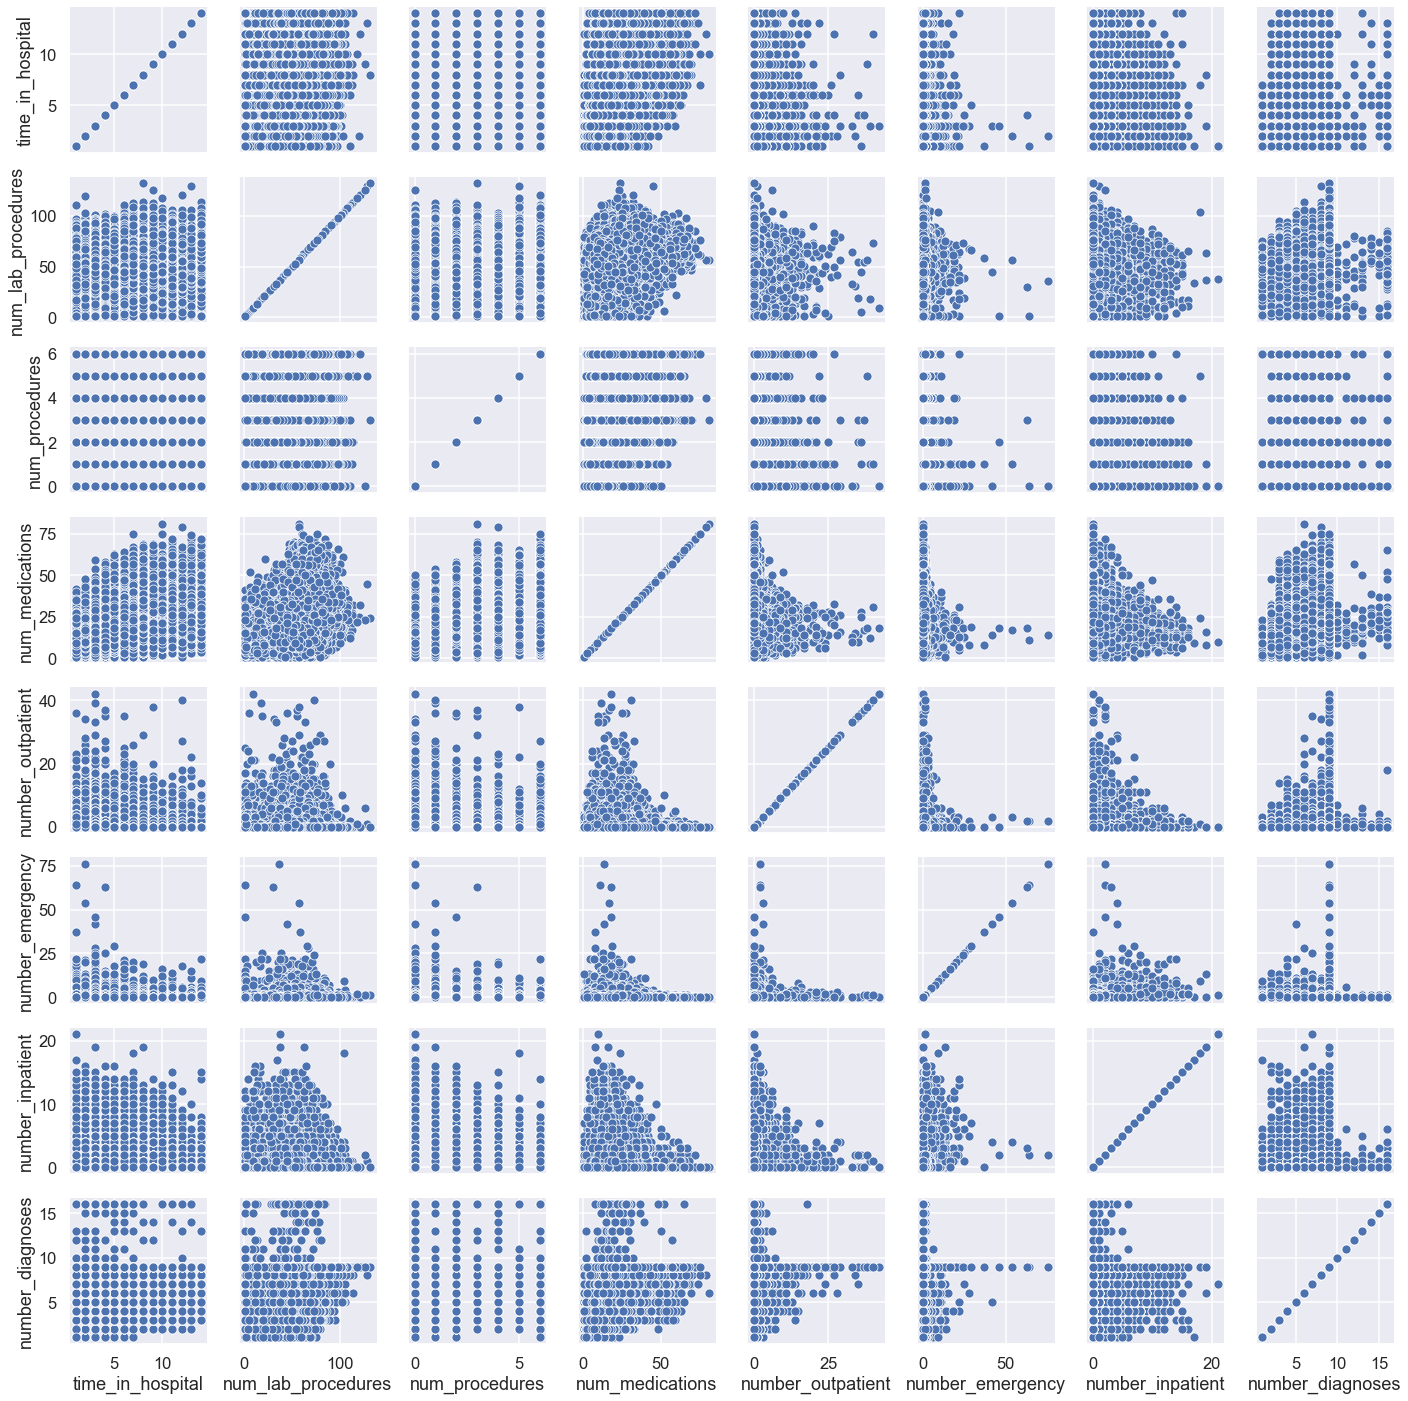

In [27]:
sns.PairGrid(df_diabetes[quantitative]).map(sns.scatterplot)
plt.savefig('plots/raw_data/pairgrid.png', dpi=300, bbox_inches='tight')

- Histograms

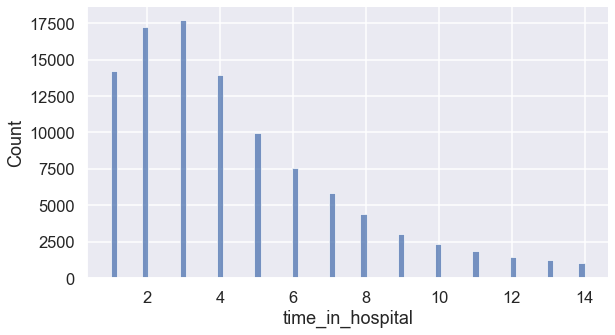

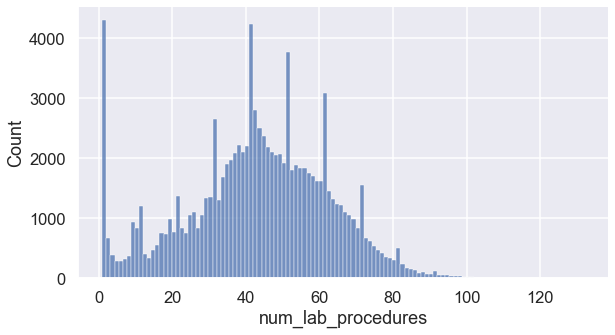

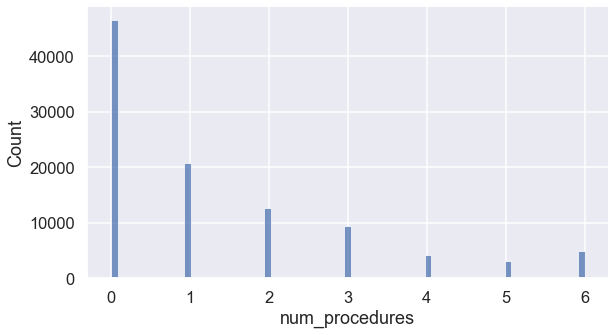

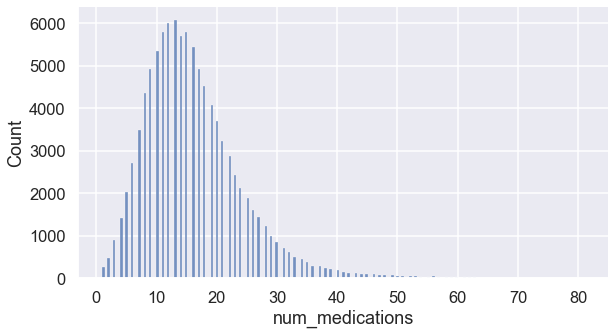

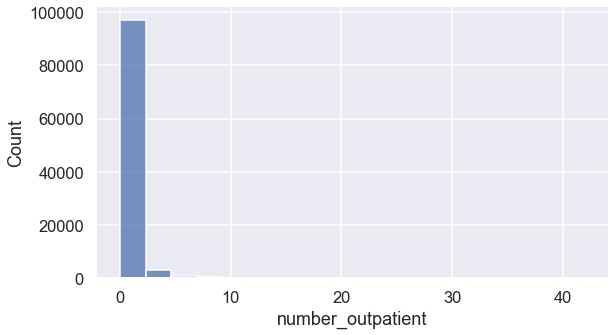

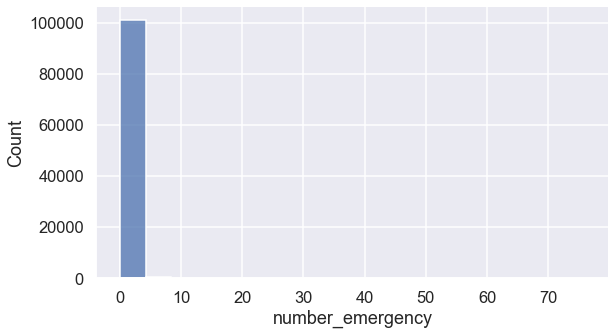

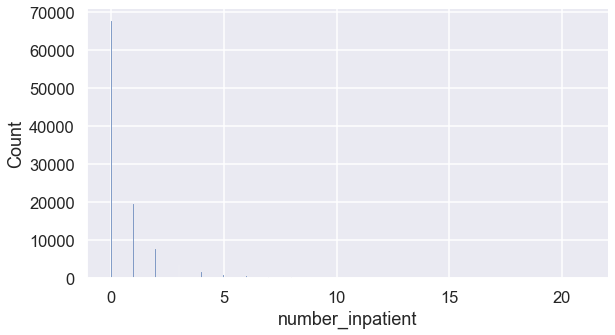

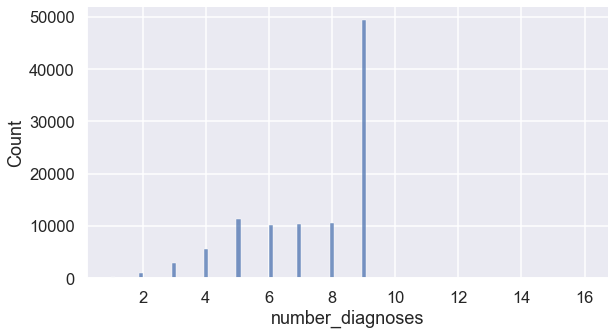

In [28]:
for col in quantitative:
    sns.displot(df_diabetes, x=col, aspect=16/9)
    plt.savefig(f'plots/raw_data/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [29]:
quantitative = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

- Boxplots

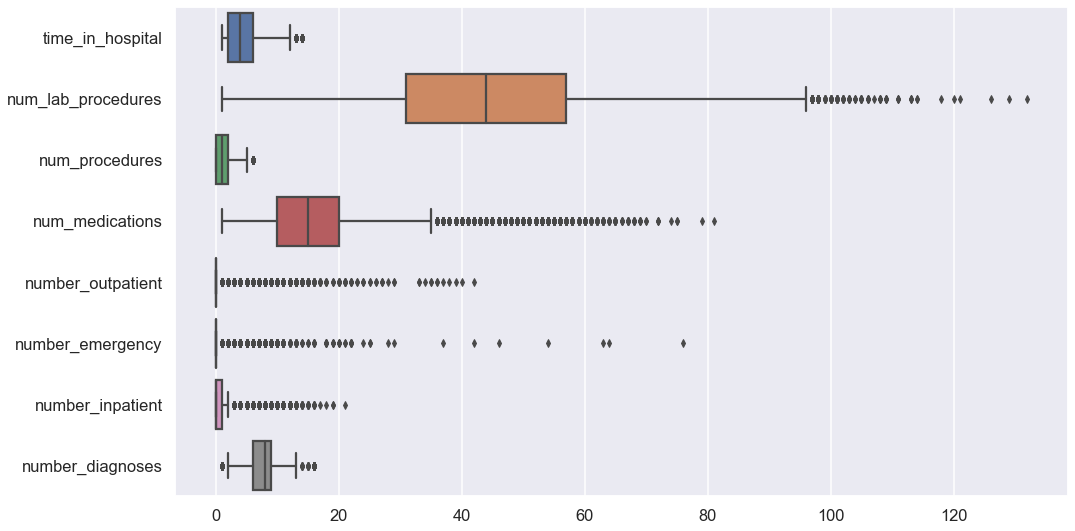

In [30]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df_diabetes[quantitative], orient='h')
plt.savefig('plots//raw_databoxplots_quantitive_features.png', dpi=300, bbox_inches='tight')

In [31]:
df_diabetes['diag_1']

0         250.83
1            276
2            648
3              8
4            197
           ...  
101761    250.13
101762       560
101763        38
101764       996
101765       530
Name: diag_1, Length: 101766, dtype: object

# 2. Data Preprocessing <a id="data-preprocessing"></a>
[Back to top](#top)

## 2.1. Row and column deletion <a id="row-column-deletion"></a>
[Back to top](#top)

- Drop rows which represent readmissions of patients (only keep first encounter for every patient)

In [32]:
df_reduced = df_diabetes.drop_duplicates(subset='patient_nbr', keep='first')

- Drop columns with substantial amount of missing values (> 30%)
<span style='color:red'>(TO DO: except for "medical_specialty", as it is an important feature)

In [33]:
to_drop = df_diabetes.loc[:, percentage_missing > 30].columns
#to_drop = to_drop.drop('medical_specialty')

df_reduced_2 = df_reduced.drop(to_drop, axis=1)

- Drop columns with only one unique value

In [34]:
df_reduced_3 = df_reduced_2.drop(df_reduced_2.loc[:, df_reduced_2.nunique() == 1].columns, axis=1)

- Drop columns for which every value is different (Encounter ID, Patient Number)

In [35]:
df_reduced_4 = df_reduced_3.drop(df_reduced_3.loc[:, df_reduced_3.nunique() == df_reduced_3.shape[0]].columns, axis=1)

## 2.2. Decoding of ID features <a id="decode-id"></a>
[Back to top](#top)

Map encoded nominal features to their description to get a more comprehensive dataset. The descriptions are provided by the creators of the raw dataset in a CSV-File. It contains the description for ``admission_type_id``, ``discharge_disposition_id``, and ``admission_source_id``.

1. Import the different parts of this CSV-File which contain the description for the respective ID features and save them as dictionaries.
2. Use the dictionaries to replace the numerical labels of the three ID columns by strings which describe their meaning.

In [36]:
dict_admission_type_id = dict(pd.read_csv(raw_data_mappings, skiprows=np.arange(9,68)).values)
dict_admission_type_id

{1: 'Emergency',
 2: 'Urgent',
 3: 'Elective',
 4: 'Newborn',
 5: 'Not Available',
 6: nan,
 7: 'Trauma Center',
 8: 'Not Mapped'}

In [37]:
dict_discharge_disposition_id = dict(pd.read_csv(raw_data_mappings, header=10, skiprows=np.arange(41,68)).values)
dict_discharge_disposition_id

{1: 'Discharged to home',
 2: 'Discharged/transferred to another short term hospital',
 3: 'Discharged/transferred to SNF',
 4: 'Discharged/transferred to ICF',
 5: 'Discharged/transferred to another type of inpatient care institution',
 6: 'Discharged/transferred to home with home health service',
 7: 'Left AMA',
 8: 'Discharged/transferred to home under care of Home IV provider',
 9: 'Admitted as an inpatient to this hospital',
 10: 'Neonate discharged to another hospital for neonatal aftercare',
 11: 'Expired',
 12: 'Still patient or expected to return for outpatient services',
 13: 'Hospice / home',
 14: 'Hospice / medical facility',
 15: 'Discharged/transferred within this institution to Medicare approved swing bed',
 16: 'Discharged/transferred/referred another institution for outpatient services',
 17: 'Discharged/transferred/referred to this institution for outpatient services',
 18: nan,
 19: 'Expired at home. Medicaid only, hospice.',
 20: 'Expired in a medical facility. Medi

In [38]:
dict_admission_source_id = dict(pd.read_csv(raw_data_mappings, header=42).values)
dict_admission_source_id

{1: ' Physician Referral',
 2: 'Clinic Referral',
 3: 'HMO Referral',
 4: 'Transfer from a hospital',
 5: ' Transfer from a Skilled Nursing Facility (SNF)',
 6: ' Transfer from another health care facility',
 7: ' Emergency Room',
 8: ' Court/Law Enforcement',
 9: ' Not Available',
 10: ' Transfer from critial access hospital',
 11: 'Normal Delivery',
 12: ' Premature Delivery',
 13: ' Sick Baby',
 14: ' Extramural Birth',
 15: 'Not Available',
 17: nan,
 18: ' Transfer From Another Home Health Agency',
 19: 'Readmission to Same Home Health Agency',
 20: ' Not Mapped',
 21: 'Unknown/Invalid',
 22: ' Transfer from hospital inpt/same fac reslt in a sep claim',
 23: ' Born inside this hospital',
 24: ' Born outside this hospital',
 25: ' Transfer from Ambulatory Surgery Center',
 26: 'Transfer from Hospice'}

In [39]:
df_mapped = df_reduced_4.copy()

df_mapped = df_mapped.replace({'admission_type_id': dict_admission_type_id,
                               'discharge_disposition_id': dict_discharge_disposition_id, 
                               'admission_source_id': dict_admission_source_id})

In [40]:
df_mapped

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,59,0,18,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,44,1,16,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,51,0,8,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),Emergency,Discharged to home,Emergency Room,9,50,2,33,...,No,No,Steady,No,No,No,No,Ch,Yes,>30
101755,Other,Female,[40-50),Emergency,Discharged to home,Emergency Room,14,73,6,26,...,No,No,Up,No,No,No,No,Ch,Yes,>30
101756,Other,Female,[60-70),Emergency,Discharged to home,Emergency Room,2,46,6,17,...,No,No,Steady,No,No,No,No,No,Yes,>30
101758,Caucasian,Female,[80-90),Emergency,Discharged to home,Emergency Room,5,76,1,22,...,No,No,Up,No,No,No,No,Ch,Yes,NO


<span style='color:red'> $\rightarrow$ Remark 1: By looking at the ID descriptions we have detected different types of missing values (nan, 'Not Mapped', 'Not Available', 'Unknown/Invalid') which were not visible before because they were encoded as numerical labels.

<span style='color:red'> $\rightarrow$ Remark 2: There are encounters which result in the patient's death or discharge to a hospice. These patients definetely won't get readmitted. Should we remove them?
    
**Article:** Additionally, we removed all encounters that resulted in either discharge to a hospice or patient death, to avoid biasing our analysis.

In [41]:
# Dead patients will not come back to the hospital :D
print(df_mapped[df_mapped['discharge_disposition_id'] == 'Expired']['readmitted'].unique())

['NO']


<span style='color:red'> TO DISCUSS: should we delete outliers (if any)?

## 2.3. Imputation of missing values <a id="imputation"></a>
[Back to top](#top)

- NaN values

In [42]:
# Identify columns with NaN values

na_values = df_mapped.isnull().sum().sort_values(ascending=False)
na_values[na_values > 0]

admission_source_id         4949
admission_type_id           4588
discharge_disposition_id    2474
dtype: int64

In [43]:
# Replace NaN values by column mode

df_imputed = df_mapped.copy()
for col in na_values[na_values > 0].index:
    df_imputed[col] = df_imputed[col].fillna(value=df_mapped[col].mode()[0])

In [44]:
# Result

df_imputed.isnull().sum().sum()

0

- Missing values encoded as '?'

In [45]:
# Identify columns with '?' values
qm_values = df_imputed.isin(['?']).sum().sort_values(ascending=False)
qm_values[qm_values > 0]

race      1948
diag_3    1225
diag_2     294
diag_1      11
dtype: int64

In [46]:
# Replace question marks by column mode

df_imputed_2 = df_imputed.copy()
for col in qm_values[qm_values > 0].index:
    df_imputed_2[col] = df_imputed_2[col].replace(to_replace='?', value=df_imputed[col].mode()[0])

In [47]:
# Result

df_imputed_2.isin(['?']).sum().sum()

0

- Missing values represented by 'Not Mapped', 'Not Available', and 'Unknown/Invalid'

In [48]:
not_mapped_values = df_imputed_2.isin(['Not Mapped']).sum().sort_values(ascending=False)
not_mapped_values[not_mapped_values > 0]

discharge_disposition_id    778
admission_type_id           291
dtype: int64

In [49]:
not_available_values = df_imputed_2.isin(['Not Available']).sum().sort_values(ascending=False)
not_available_values[not_available_values > 0]

admission_type_id    3174
dtype: int64

In [50]:
unknown_invalid_values = df_imputed_2.isin(['Unknown/Invalid']).sum().sort_values(ascending=False)
unknown_invalid_values[unknown_invalid_values > 0]

gender    3
dtype: int64

<span style='color:red'> $\rightarrow$ Unknown/Invalid in Gender feature: Are these missing values or non-binary people?

In [51]:
df_imputed_3 = df_imputed_2.copy()
for col in not_mapped_values[not_mapped_values > 0].index:
    df_imputed_3[col] = df_imputed_3[col].replace(to_replace='?', value=df_imputed_2[col].mode()[0])
    
for col in not_available_values[not_available_values > 0].index:
    df_imputed_3[col] = df_imputed_3[col].replace(to_replace='?', value=df_imputed_2[col].mode()[0])

## 2.4. Ordinal encoding of age column <a id="ordinal-encoding"></a>
[Back to top](#top)

- The age column contains strings which denote an age interval.

In [52]:
df_imputed_3['age']

0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101754    [70-80)
101755    [40-50)
101756    [60-70)
101758    [80-90)
101765    [70-80)
Name: age, Length: 71518, dtype: object

- Replace the strings by integers which reflect the ordinal nature of the given data.

In [53]:
df_encoded = df_imputed_3.copy()
for i in range(0, 9):
    df_encoded['age'] = df_encoded['age'].replace(to_replace=f'[{10 * i}-{10 * i + 10})', value=i)

df_encoded['age']

0         0
1         1
2         2
3         3
4         4
         ..
101754    7
101755    4
101756    6
101758    8
101765    7
Name: age, Length: 71518, dtype: object

## 2.5. Complexity reduction by grouping categorical values <a id="grouping"></a>
[Back to top](#top)

- Group the diagnosis codes (ICD-9 codes) to reduce the amount of unique values substantially <span style='color:red'> (Maybe combine some of the categories under 'Other' to reduce the amount of categories)

In [54]:
# ICD-9 codes grouped with respect to the following articles: 
    # https://simba.isr.umich.edu/restricted/docs/Mortality/icd_09_codes.pdf
    # https://en.wikipedia.org/wiki/List_of_ICD-9_codes
    # https://www.hindawi.com/journals/bmri/2014/781670/

# Define function which replaces the ICD-9 codes in a given Series by the label representing the larger diagnosis group
def categorize_icd9_codes(feature):
    
    # create list to save results 
    list = []
    
    # Categorize icd9 codes
    for index, item in enumerate(feature):      
            
        # E and V codes
        if(any(c.isalpha() for c in item)):
            item = 'external causes of injury and supplemental classification'
        
        #Purely numeric codes
        else:
            # Convert strings into float
            item = float(item)
        
            # Categorize the icd-9 codes
            if(item > 0 and item <= 139):
                item = "infectious and parasitic diseases"
            elif(item >= 140 and item <= 239):
                item = "neoplasms"
            elif(item >= 240 and item <= 279):
                item = "endocrine, nutritional and metabolic diseases, and immunity disorders"
            elif(item >= 280 and item <= 289):
                item = "diseases of the blood and blood-forming organs"
            elif(item >= 290 and item <= 319):
                item = "mental disorders"
            elif(item >= 320 and item <= 389):
                item = "diseases of the nervous system and sense organs"
            elif(item >= 390 and item <= 459):
                item = "diseases of the circulatory system"
            elif(item >= 460 and item <= 519):
                item = "diseases of the respiratory system"
            elif(item >= 520 and item <= 579):
                item = "diseases of the digestive system"
            elif(item >= 580 and item <= 629):
                item = "diseases of the genitourinary system"
            elif(item >= 630 and item <= 679):
                item = "complications of pregnancy, childbirth, and the puerperium"
            elif(item >= 680 and item <= 709):
                item = "diseases of the skin and subcutaneous tissue"
            elif(item >= 710 and item <= 739):
                item = "diseases of the musculoskeletal system and connective tissue"
            elif(item >= 740 and item <= 759):
                item = "congenital anomalies"
            elif(item >= 760 and item <= 779):
                item = "certain conditions originating in the perinatal period"
            elif(item >= 780 and item <= 799):
                item = "symptoms, signs, and ill-defined conditions"
            elif(item >= 800 and item <= 999):
                item = "injury and poisoning"
            else:
                item = "other"
        
        # Save results as Series
        list.append(item)
        new_feature = pd.Series(list)

    return new_feature

In [55]:
# Categorize the icd9 codes in diag_1, diag_2 and diag_3 using the function defined above

df_grouped = df_encoded.copy()
for col in ['diag_1', 'diag_2', 'diag_3']:
    %time df_grouped[col] = categorize_icd9_codes(df_encoded[col])

Wall time: 2min 35s
Wall time: 2min 39s
Wall time: 3min 36s


In [56]:
# Result
df_grouped.select_dtypes('object').nunique().sort_values(ascending=False)

discharge_disposition_id    25
diag_2                      17
diag_3                      17
diag_1                      17
admission_source_id         16
age                         10
admission_type_id            7
race                         5
insulin                      4
glyburide-metformin          4
miglitol                     4
A1Cresult                    4
rosiglitazone                4
pioglitazone                 4
glyburide                    4
glipizide                    4
max_glu_serum                4
glimepiride                  4
chlorpropamide               4
nateglinide                  4
repaglinide                  4
metformin                    4
gender                       3
readmitted                   3
acarbose                     3
diabetesMed                  2
tolbutamide                  2
troglitazone                 2
tolazamide                   2
glipizide-metformin          2
metformin-rosiglitazone      2
metformin-pioglitazone       2
change  

## 2.6. Transform target variable <a id="target"></a>
[Back to top](#top)

- Create binary target variable: Readmission within 30 days (and drop old target column)

In [57]:
df = df_grouped.copy()

# add column with new target
df['readmitted_within_30_days'] = df['readmitted'].replace(to_replace=['NO', '>30', '<30'], value=[0, 0, 1])

# drop old column
df = df.drop('readmitted', axis=1)

## 2.7. One-hot Encoding <a id="one-hot-encoding"></a>
[Back to top](#top)

- Dummy-encode nominal (categorical) features 
  <span style='color:red' > (TO DO: Discuss if ``drop_first = True`` oder ``drop_first = False`` !)

In [58]:
#df_encoded = pd.get_dummies(df)
df_ohe = pd.get_dummies(df, drop_first=True)

In [59]:
df_ohe.shape

(71518, 170)

$\rightarrow$ Result: Fully numericalized dataset:

## 2.8. Split in training and test sets <a id="train-test-split"></a>
[Back to top](#top)

- Split features and target variable and create training and test sets using shuffled and stratified split strategy

In [60]:
X = df_ohe.drop(['readmitted_within_30_days'], axis=1)
y = df_ohe['readmitted_within_30_days']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [62]:
print(f' X_train: {X_train.shape}, y_train: {y_train.shape} \n X_test: {X_test.shape}, y_test: {y_test.shape}')

 X_train: (53638, 169), y_train: (53638,) 
 X_test: (17880, 169), y_test: (17880,)


**@Douglas: I don't know why but your approach below results in datasets with less columns?**

In [63]:
#from sklearn.model_selection import StratifiedShuffleSplit

#X = df_ohe.drop(['readmitted_within_30_days'], axis = 1)
#y = df_ohe['readmitted_within_30_days']

#sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

#for train_index, test_index in sss.split(X, y):
 #   df_train = df.iloc[train_index]
  #  df_test = df.iloc[test_index]
    
#print('Train dataset shape:', df_train.shape)
#print('Test dataset shape:', df_test.shape)

## 2.9. Optional Data Balancing <a id="balancing"></a>
[Back to top](#top)

including plots to illustrate the data imbalance and the sampling methods

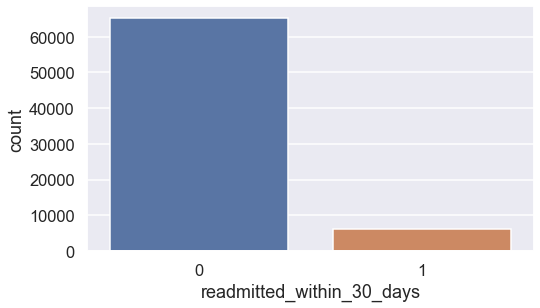

In [64]:
plt.figure(figsize=(8,4.5))
sns.countplot(data=df, x='readmitted_within_30_days')
plt.savefig('plots/preprocessed_data/readmitted_within_30_days.png', dpi=300, bbox_inches='tight')

- **Random Undersampling** on training set: Randomly selected instances of the majority class are deleted until the classes are balanced.

In [65]:
rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [66]:
X_train_rus.shape, y_train_rus.shape

((9440, 169), (9440,))

C:\Users\fabio\anaconda3\envs\fastai-cpu-v0.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


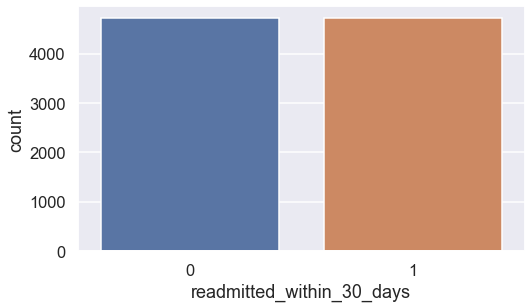

In [67]:
plt.figure(figsize=(8,4.5))
sns.countplot(y_train_rus)
plt.savefig('plots/preprocessed_data/y_train_rus.png', dpi=300, bbox_inches='tight')

- **Random Oversampling** on training set: Randomly selected instances of minority class are duplicated until the classes are balanced.

In [68]:
ros = RandomOverSampler(random_state=42)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [69]:
X_train_ros.shape, y_train_ros.shape

((97836, 169), (97836,))

C:\Users\fabio\anaconda3\envs\fastai-cpu-v0.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


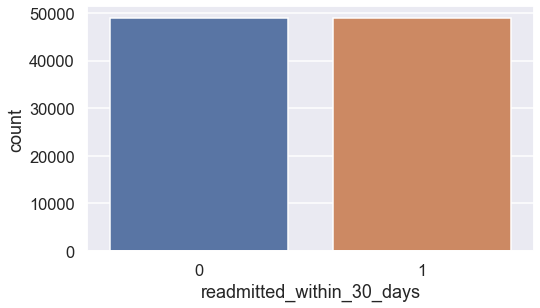

In [70]:
plt.figure(figsize=(8,4.5))
sns.countplot(y_train_ros)
plt.savefig('plots/preprocessed_data/y_train_ros', dpi=300, bbox_inches='tight')

- **Synthetic Minority Oversampling Technique**: New instances of the minority class are synthesized by interpolating existing data points.

In [71]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [72]:
X_train_ros.shape, y_train_ros.shape

((97836, 169), (97836,))

C:\Users\fabio\anaconda3\envs\fastai-cpu-v0.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


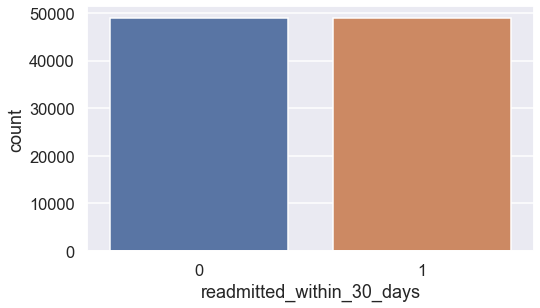

In [73]:
plt.figure(figsize=(8,4.5))
sns.countplot(y_train_smote)
plt.savefig('plots/preprocessed_data/y_train_smote', dpi=300, bbox_inches='tight')

## 2.10. Save Preprocessed Dataframes  <a id="save"></a>
[Back to top](#top)

The preprocessed dataframes are saved in CSV files that will be retrieved for training the models.

This saves us time as we don't need to go through the preprocessing each time while working on the model building.

- Preprocessed data with original data distribution

In [74]:
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

- Randomly undersampled sets

In [75]:
X_train_rus.to_csv('data/X_train_rus.csv', index=False)
y_train_rus.to_csv('data/y_train_rus.csv', index=False)

- Randomly oversampled sets

In [76]:
X_train_ros.to_csv('data/X_train_ros.csv', index=False)
y_train_ros.to_csv('data/y_train_ros.csv', index=False)

- Sets resulting from SMOTE

In [77]:
X_train_smote.to_csv('data/X_train_smote.csv', index=False)
y_train_smote.to_csv('data/y_train_smote.csv', index=False)

# 3. Model Building <a id="model-building"></a>
[Back to top](#top)

In [78]:
# ...

## 3.1. Logistic Regression <a id="logistic-regression"></a>
[Back to top](#top)

In [82]:
# ...

## 3.2. Naive Bayes <a id="naive-bayes"></a>
[Back to top](#top)

In [83]:
# ...

## 3.3. Random Forest <a id="random-forest"></a>
[Back to top](#top)

In [84]:
# ...

## 3.4. CatBoost<a id="catboost"></a>
[Back to top](#top)

In [85]:
# ...

## 3.5. XGBoost <a id="xgboost"></a>
[Back to top](#top)

In [86]:
# ...

# 4 Final Model Evaluation and Conclusion <a id="model-evaluation"></a>
[Back to top](#top)

In [87]:
# ...